In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# train set should be first 463,715 observations
# test set should be last 51,630 observations

df1 = pd.read_csv("YearPredictionMSD.csv")
train, test = df1[0:463715], df1[463715:len(df1)]
X_train = train.drop(['Year'], axis = 1)
y_train = train[["Year"]]

X_test = test.drop(['Year'], axis = 1)
y_test = test[['Year']]

X = df1.drop(['Year'], axis = 1)

y_train, y_test = y_train.to_numpy().ravel(), y_test.to_numpy().ravel()

In [3]:
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_train.transform(X_train)

print("Column Means")
print(scaler_train.mean_)
print("")

scaler_test = preprocessing.StandardScaler().fit(X_test)
scaler_test.transform(X_test)

Column Means
[ 4.33854878e+01  1.26109102e+00  8.65019512e+00  1.13076327e+00
 -6.51272453e+00 -9.56552710e+00 -2.38460950e+00 -1.79372153e+00
  3.71458446e+00  1.87249454e+00 -1.43124984e-01  2.54142311e+00
  3.36688834e+01  2.43589646e+03  1.96510182e+03  1.51205063e+03
  9.10432803e+02  8.77598892e+02  6.03197107e+02  5.16171624e+02
  3.93807387e+02  3.25034711e+02  2.88237354e+02  2.92140920e+02
  4.30846834e+01  4.32472924e+01 -4.63454595e+01 -2.79639129e+01
  1.46140187e+01  4.46637702e+01  5.33815379e+00  2.39861677e+01
  9.84432620e+00 -4.15316743e+00  6.36737045e-01  7.27213158e+01
 -5.17048243e+01  1.17332411e+02 -1.89741066e+02  2.32635453e+01
 -1.19240277e+00  1.84593563e+01 -5.18602549e+01  3.17096696e+00
 -1.51814254e+00  6.36787852e+00  7.85528815e+01  1.43006647e+02
 -8.62206018e+01  2.53047310e+01  6.25004805e+00  2.83298998e+01
  1.26734419e+01  1.74636568e+00 -1.01378234e+01  6.40029203e+01
  1.04409785e+02 -2.29792748e-01  3.89656732e+01 -2.81401879e+01
  3.18316458

array([[ 0.34216516, -0.6297621 ,  0.6530424 , ..., -0.6220881 ,
         0.07158056,  0.25774003],
       [ 1.55577072, -0.08647099,  0.9976827 , ..., -0.63292771,
        -0.47776912, -0.29352558],
       [ 0.39253821,  0.20431881,  0.06510866, ..., -1.14242281,
         0.02117072, -0.31898688],
       ...,
       [ 0.28959002,  0.21669508, -1.34413072, ..., -0.78484663,
         0.16300768, -0.42161033],
       [ 0.12818494,  0.60136042, -0.34221738, ...,  1.15970588,
        -0.04097762,  1.70733122],
       [ 1.41809724,  1.12266004,  0.50032106, ..., -0.74384057,
         0.05037527,  0.4802529 ]])

# Logistic Regression (Warning: Run times are very long for this section)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
# model with l2 penalty and stochastic average gradient descent
# some years have too few samples to use CV effectively
# 100 iterations score: 0.075363 (does not converge)
# 200 iterations score: 0.076157 (did not converge)
# 500 iterations score: 0.076951 (did not converge)
lr1 = LogisticRegression(penalty = "l2", solver = "sag", max_iter = 100, multi_class = "multinomial")
lr2 = LogisticRegression(penalty = "l2", solver = "sag", max_iter = 200, multi_class = "multinomial")
lr3 = LogisticRegression(penalty = "l2", solver = "sag", max_iter = 500, multi_class = "multinomial")
lr4 = LogisticRegression(penalty = "l2", solver = "sag", max_iter = 1000, multi_class = "multinomial")

# model with l2 penalty and saga
lr5 = LogisticRegression(penalty = "l2", solver = "saga", max_iter = 200, multi_class = "multinomial")
# model with saga and l1 penalty- would not even run without PCA
lr6 = LogisticRegression(penalty = "l1", solver = "saga", max_iter = 200, multi_class = "multinomial")

In [19]:
print('LogisticRegression score: %f'
      % lr1.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.075363


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [21]:
print('LogisticRegression score: %f'
      % lr2.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.076177


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [7]:
print('LogisticRegression score: %f'
      % lr3.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.076951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
print('LogisticRegression score: %f'
      % lr4.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.076641


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [7]:
print('LogisticRegression score: %f'
      % lr5.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.075363


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Naive Bayes Classifier

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

In [5]:
# Gaussian Naive Bayes Classifier
nb1 = GaussianNB()

# Multinomial Naive Bayes , with minimal smoothing - comparable to logistic regression
nb2 = MultinomialNB(alpha = 0)

# Multinomial Bayes, without laerning prior class probabilities
nb3 = MultinomialNB(fit_prior = False)

# Complement Naive Bayes with smoothing
nb4 = ComplementNB()

# Complement Naive Bayes without smoothing
nb5 = ComplementNB(alpha = 0)

In [6]:
# transformation into a uniform distribution
X_NBtrain = train.drop(['Year'], axis = 1)
X_NBtest = test.drop(['Year'], axis = 1)

NBscaler = preprocessing.QuantileTransformer(random_state = 0)
X_NBtrain = NBscaler.fit_transform(X_NBtrain)
X_NBtest = NBscaler.transform(X_NBtest)

X_NBtrain

array([[0.87673283, 0.61917969, 0.97034838, ..., 0.27748727, 0.35806442,
        0.56870986],
       [0.80768563, 0.59116726, 0.96657251, ..., 0.79727522, 0.67860702,
        0.91726575],
       [0.92582795, 0.71370076, 0.93140715, ..., 0.34995101, 0.61960856,
        0.47323717],
       ...,
       [0.50870872, 0.44205384, 0.8314468 , ..., 0.19243607, 0.55749753,
        0.36589806],
       [0.54415129, 0.55202159, 0.30423171, ..., 0.78741825, 0.79070262,
        0.84662991],
       [0.89671301, 0.48595067, 0.92502476, ..., 0.53028511, 0.30324501,
        0.49741072]])

In [14]:
print('Gaussian Naive Bayes score: %f'
      % nb1.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.025199


In [21]:
#lets try Gaussian Naive Bayes again - the score doubled!
print('Gaussian Naive Bayes score: %f'
      % nb1.fit(X_NBtrain, y_train).score(X_NBtest, y_test))

Gaussian Naive Bayes score: 0.050591


In [25]:
print('Multinomial Naive Bayes score: %f'
      % nb2.fit(X_NBtrain, y_train).score(X_NBtest, y_test))

Multinomial Naive Bayes score: 0.076545


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [29]:
print('Multinomial Naive Bayes score: %f'
      % nb3.fit(X_NBtrain, y_train).score(X_NBtest, y_test))

Multinomial Naive Bayes score: 0.024056


In [32]:
print('Complement Naive Bayes score: %f'
      % nb4.fit(X_NBtrain, y_train).score(X_NBtest, y_test))

Complement Naive Bayes score: 0.063490


In [34]:
print('Multinomial Naive Bayes score: %f'
      % nb5.fit(X_NBtrain, y_train).score(X_NBtest, y_test))

Multinomial Naive Bayes score: 0.063490


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Dimensionality Reduction

In [7]:
from sklearn.decomposition import PCA
X = df1.drop(['Year'], axis = 1)

In [8]:
# We'll use Minka's MLE to guess the right dimension to shrink down to

pca1 = PCA(n_components = "mle", random_state = 0)

In [9]:
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# The first 12 values explain around 89.19% of the variance
# The first 16 values explain around 92.13% of the variance
# The first 20 values explain about 94.17% of the variance
print(pca1.explained_variance_ratio_)

[4.69129087e-01 1.44452300e-01 9.16071808e-02 4.94173064e-02
 3.09667192e-02 2.26959429e-02 1.78506747e-02 1.62960131e-02
 1.54998357e-02 1.26567966e-02 1.15365341e-02 9.77816371e-03
 8.50272597e-03 7.20146123e-03 7.08045957e-03 6.58342524e-03
 5.73460328e-03 5.49899948e-03 5.17693192e-03 4.01716544e-03
 3.91385202e-03 3.79870445e-03 3.63724774e-03 3.42144831e-03
 3.24638991e-03 3.04764111e-03 2.63602148e-03 2.45073145e-03
 2.21476192e-03 2.04446309e-03 1.89625841e-03 1.63248130e-03
 1.57551029e-03 1.38018475e-03 1.34064272e-03 1.26564227e-03
 1.23833105e-03 1.18346749e-03 1.16667288e-03 1.06925305e-03
 1.05735061e-03 1.00147661e-03 9.19187623e-04 8.29062098e-04
 8.12094801e-04 7.79086578e-04 7.24764946e-04 6.71123775e-04
 6.53881659e-04 5.94043158e-04 5.54636958e-04 4.75165852e-04
 4.27416691e-04 4.23034520e-04 4.01464849e-04 3.83693047e-04
 3.45179286e-04 3.02347951e-04 2.82114774e-04 2.69079886e-04
 2.41419030e-04 2.33521136e-04 2.05228678e-04 1.67599640e-04
 1.63175674e-04 1.553944

In [11]:
pca1.transform(X)

array([[-2.41570925e+03,  2.84753807e+01,  1.23781901e+02, ...,
         6.99534472e+00,  7.25593055e-02,  4.64089085e-01],
       [-1.43982129e+03,  1.12952402e+03, -2.33777907e+02, ...,
        -1.76152800e+00, -6.04806615e-01,  1.59304717e+00],
       [-2.34367603e+03,  2.18171296e+01,  3.29842097e+01, ...,
         4.12466046e+00, -1.54873878e+00,  1.89901319e+00],
       ...,
       [ 6.68572338e+02, -2.24899884e+03, -1.61302934e+02, ...,
         2.14572817e+00,  2.43855245e+00, -4.80984682e+00],
       [ 1.91668166e+02,  3.01911843e+02, -2.43255644e+02, ...,
        -1.05149435e+01,  8.72731367e-01, -1.85515304e+00],
       [-2.37660731e+03, -1.98431248e+02,  5.19438128e+01, ...,
         5.03286451e-01, -1.04869406e+00,  7.60095278e-01]])

In [12]:
# Using the 12 best features

df2 = pd.DataFrame(data = pca1.transform(X)[0:, 0:12])
X_train_pca, X_test_pca = df2[0:463715], df2[463715:len(df2)]

In [13]:
scaler_train_pca = preprocessing.StandardScaler().fit(X_train_pca)
scaler_train_pca.transform(X_train_pca)

print("Column Means")
print(scaler_train_pca.mean_)
print("")

scaler_train_pca.transform(X_test_pca)

Column Means
[-5.47613784  1.35240128  0.64083306  0.41440344  0.37181038 -0.33657791
 -0.00561365 -0.20171023  0.33421867 -0.23114273  0.17239603  0.32433042]



array([[-6.29976876e-01, -7.72554936e-02,  1.77645908e-01, ...,
         4.06475679e-01,  3.15050460e-01,  3.29816921e-01],
       [-1.19146049e+00,  3.02941123e-01,  1.35995136e-01, ...,
        -1.02749882e-01,  8.01257706e-01, -1.81354114e-02],
       [-4.45279345e-01,  3.27494353e-01, -7.50701926e-02, ...,
         7.90644348e-01, -1.23886619e-01,  7.46174013e-02],
       ...,
       [ 3.18980528e-01, -1.91713807e+00, -1.73280128e-01, ...,
         1.81606576e+00,  1.15357656e+00,  3.63861473e+00],
       [ 9.32947649e-02,  2.56055116e-01, -2.60969678e-01, ...,
         6.55676044e-01,  2.13179997e-03,  8.37193908e-01],
       [-1.12209240e+00, -1.70201360e-01,  5.48942824e-02, ...,
        -9.02033411e-01,  4.78412937e-01, -5.58671268e-01]])

In [14]:
# Using the 16 best features

df3 = pd.DataFrame(data = pca1.transform(X)[0:, 0:16])
X_train_pca2, X_test_pca2 = df3[0:463715], df3[463715:len(df2)]

scaler_train_pca2 = preprocessing.StandardScaler().fit(X_train_pca2)
scaler_train_pca2.transform(X_train_pca2)

print("Column Means")
print(scaler_train_pca2.mean_)
print("")

scaler_train_pca2.transform(X_test_pca2)

Column Means
[-5.47613784  1.35240128  0.64083306  0.41440344  0.37181038 -0.33657791
 -0.00561365 -0.20171023  0.33421867 -0.23114273  0.17239603  0.32433042
 -0.24311959 -0.2784732  -0.21387226 -0.09694083]



array([[-0.62997688, -0.07725549,  0.17764591, ..., -0.58816312,
         0.79222716,  0.23207329],
       [-1.19146049,  0.30294112,  0.13599514, ...,  0.46345768,
        -0.16478927, -0.1625934 ],
       [-0.44527935,  0.32749435, -0.07507019, ..., -0.11516975,
        -0.50110057,  0.33104077],
       ...,
       [ 0.31898053, -1.91713807, -0.17328013, ..., -0.42306023,
         0.55430029, -0.56779432],
       [ 0.09329476,  0.25605512, -0.26096968, ..., -0.5939082 ,
        -0.20234308,  1.94044213],
       [-1.1220924 , -0.17020136,  0.05489428, ..., -0.74733648,
         0.06147628, -0.29704292]])

In [15]:
# Using the 20 best features

df4 = pd.DataFrame(data = pca1.transform(X)[0:, 0:20])
X_train_pca4, X_test_pca4 = df4[0:463715], df4[463715:len(df2)]

scaler_train_pca4 = preprocessing.StandardScaler().fit(X_train_pca4)
scaler_train_pca4.transform(X_train_pca4)

print("Column Means")
print(scaler_train_pca4.mean_)
print("")

scaler_train_pca4.transform(X_test_pca4)

Column Means
[-5.47613784  1.35240128  0.64083306  0.41440344  0.37181038 -0.33657791
 -0.00561365 -0.20171023  0.33421867 -0.23114273  0.17239603  0.32433042
 -0.24311959 -0.2784732  -0.21387226 -0.09694083  0.7566177  -0.41034448
  0.04873569 -0.26438545]



array([[-0.62997688, -0.07725549,  0.17764591, ..., -0.25031007,
        -0.12458178,  0.0665497 ],
       [-1.19146049,  0.30294112,  0.13599514, ..., -0.36857815,
         0.79570832,  0.14050808],
       [-0.44527935,  0.32749435, -0.07507019, ...,  0.11675572,
         0.18092826, -0.07307488],
       ...,
       [ 0.31898053, -1.91713807, -0.17328013, ..., -0.18021961,
         1.33922738, -1.54398572],
       [ 0.09329476,  0.25605512, -0.26096968, ..., -0.11337524,
         0.05484543, -0.83419513],
       [-1.1220924 , -0.17020136,  0.05489428, ..., -0.81494286,
        -0.11210345,  0.41357002]])

# Logistic Regression Revisited

In [13]:
# sag, l2, 12 PCA features
print('LogisticRegression with 12 PCA score: %f'
      % lr1.fit(X_train_pca, y_train).score(X_test_pca, y_test))

LogisticRegression with PCA score: 0.052566


In [16]:
# saga, l2, 12 PCA features
print('LogisticRegression with 12 PCA score: %f'
      % lr5.fit(X_train_pca, y_train).score(X_test_pca, y_test))

LogisticRegression with PCA score: 0.052605


In [17]:
# saga, l1, 12 PCA features
print('LogisticRegression with 12 PCA score: %f'
      % lr6.fit(X_train_pca, y_train).score(X_test_pca, y_test))

LogisticRegression with PCA score: 0.052605


In [21]:
# sag, l2, 16 PCA features
print('LogisticRegression with 16 PCA score: %f'
      % lr1.fit(X_train_pca2, y_train).score(X_test_pca2, y_test))

LogisticRegression with PCA score: 0.052140


In [23]:
# saga, l2, 16 PCA features
print('LogisticRegression with 16 PCA score: %f'
      % lr5.fit(X_train_pca2, y_train).score(X_test_pca2, y_test))

LogisticRegression with PCA score: 0.052160


In [24]:
# saga, l1, 16 PCA features
print('LogisticRegression with 16 PCA score: %f'
      % lr6.fit(X_train_pca2, y_train).score(X_test_pca2, y_test))

LogisticRegression with 16 PCA score: 0.052140


# Naive Bayes Revisited

In [16]:
# transformation into a uniform distribution

NBscaler_pca = preprocessing.QuantileTransformer(random_state = 0)
X_NBtrain_pca = NBscaler_pca.fit_transform(X_train_pca)
X_NBtest_pca = NBscaler_pca.transform(X_test_pca)

X_NBtrain_pca

array([[0.06003243, 0.48501545, 0.63236903, ..., 0.24029266, 0.36120922,
        0.45005353],
       [0.25203088, 0.90064275, 0.35962321, ..., 0.43758739, 0.17304116,
        0.52646613],
       [0.07029654, 0.48162567, 0.56880927, ..., 0.32393098, 0.4355685 ,
        0.68766206],
       ...,
       [0.1818026 , 0.76914295, 0.70445066, ..., 0.28488902, 0.57744552,
        0.27512192],
       [0.57982614, 0.91249194, 0.12082691, ..., 0.64030368, 0.81637009,
        0.93745178],
       [0.00181788, 0.70935625, 0.49147013, ..., 0.3297896 , 0.65235746,
        0.53374923]])

In [24]:
print('Gaussian Naive Bayes, 12 features PCA score: %f'
      % nb1.fit(X_train_pca2, y_train).score(X_test_pca2, y_test))

Gaussian Naive Bayes, 12 features PCA score: 0.045749


In [25]:
print('Multinomial Naive Bayes, 12 features score: %f'
      % nb1.fit(X_NBtrain_pca, y_train).score(X_NBtest_pca, y_test))

Multinomial Naive Bayes, 12 features score: 0.073484


In [26]:
# This is the best NB model so far

print('Multinomial Naive Bayes, 12 features score: %f'
      % nb2.fit(X_NBtrain_pca, y_train).score(X_NBtest_pca, y_test))

Multinomial Naive Bayes, 12 features score: 0.078036


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [27]:
print('Multinomial Naive Bayes, 12 features score: %f'
      % nb3.fit(X_NBtrain_pca, y_train).score(X_NBtest_pca, y_test))

Multinomial Naive Bayes, 12 features score: 0.007747


In [28]:
print('Multinomial Naive Bayes, 12 features score: %f'
      % nb4.fit(X_NBtrain_pca, y_train).score(X_NBtest_pca, y_test))

Multinomial Naive Bayes, 12 features score: 0.052818


In [29]:
print('Multinomial Naive Bayes, 12 features score: %f'
      % nb5.fit(X_NBtrain_pca, y_train).score(X_NBtest_pca, y_test))

Multinomial Naive Bayes, 12 features score: 0.052818


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Our best performing models so far, in regards to test set accuracy, seem to be nb2 (Multinomial Naive Bayes with minimal smoothing) and any of the Logistic Regression models with SAG and L2 penalty.

# Testing 20+ features

In [40]:
print('LogisticRegression with 20 PCA score: %f'
      % lr5.fit(X_train_pca4, y_train).score(X_test_pca4, y_test))

LogisticRegression with 16 PCA score: 0.051908


In [17]:
NBscaler_pca4 = preprocessing.QuantileTransformer(random_state = 0)
X_NBtrain_pca4 = NBscaler_pca.fit_transform(X_train_pca4)
X_NBtest_pca4 = NBscaler_pca.transform(X_test_pca4)

X_NBtrain_pca4

array([[0.06003243, 0.48501545, 0.63236903, ..., 0.55972415, 0.45597434,
        0.42451947],
       [0.25203088, 0.90064275, 0.35962321, ..., 0.31506806, 0.09628903,
        0.67968726],
       [0.07029654, 0.48162567, 0.56880927, ..., 0.20200954, 0.44787993,
        0.46862788],
       ...,
       [0.1818026 , 0.76914295, 0.70445066, ..., 0.49037484, 0.69768075,
        0.47057587],
       [0.57982614, 0.91249194, 0.12082691, ..., 0.69806193, 0.78366625,
        0.31193741],
       [0.00181788, 0.70935625, 0.49147013, ..., 0.43376021, 0.60486704,
        0.40982413]])

In [42]:
print('Multinomial Naive Bayes 20 feature score: %f'
      % nb2.fit(X_NBtrain_pca4, y_train).score(X_NBtest_pca4, y_test))

Multinomial Naive Bayes 20 feature score: 0.077920


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [18]:
df5 = pd.DataFrame(data = pca1.transform(X))
X_train_pca5, X_test_pca5 = df2[0:463715], df2[463715:len(df2)]

NBscaler_pca5 = preprocessing.QuantileTransformer(random_state = 0)
X_NBtrain_pca5 = NBscaler_pca.fit_transform(X_train_pca5)
X_NBtest_pca5 = NBscaler_pca.transform(X_test_pca5)

X_NBtrain_pca5

array([[0.06003243, 0.48501545, 0.63236903, ..., 0.24029266, 0.36120922,
        0.45005353],
       [0.25203088, 0.90064275, 0.35962321, ..., 0.43758739, 0.17304116,
        0.52646613],
       [0.07029654, 0.48162567, 0.56880927, ..., 0.32393098, 0.4355685 ,
        0.68766206],
       ...,
       [0.1818026 , 0.76914295, 0.70445066, ..., 0.28488902, 0.57744552,
        0.27512192],
       [0.57982614, 0.91249194, 0.12082691, ..., 0.64030368, 0.81637009,
        0.93745178],
       [0.00181788, 0.70935625, 0.49147013, ..., 0.3297896 , 0.65235746,
        0.53374923]])

In [44]:
print('Multinomial Naive Bayes 20 feature score: %f'
      % nb2.fit(X_NBtrain_pca5, y_train).score(X_NBtest_pca5, y_test))

Multinomial Naive Bayes 20 feature score: 0.078036


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Prediction by Decade

In [19]:
df6 = pd.read_csv("YearPredictionMSD_decade.csv")
train_decade, test_decade = df6[0:463715], df6[463715:len(df1)]

y_train_decade = train_decade[["Year"]]
y_test_decade = test_decade[['Year']]

y_train_decade, y_test_decade = y_train_decade.to_numpy().ravel(), y_test_decade.to_numpy().ravel()

In [30]:
print('Multinomial Naive Bayes, 12 features, Decade Prediction score: %f'
      % nb2.fit(X_NBtrain_pca, y_train_decade).score(X_NBtest_pca, y_test_decade))

Multinomial Naive Bayes, 12 features, Decade Prediction score: 0.598838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [34]:
print('Multinomial Naive Bayes, 20 features, Decade Prediction score: %f'
      % nb2.fit(X_NBtrain_pca4, y_train_decade).score(X_NBtest_pca4, y_test_decade))

Multinomial Naive Bayes, 20 features, Decade Prediction score: 0.598838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [33]:
print('LogisticRegression, 12 features, Decade Prediction score: %f'
      % lr5.fit(X_train_pca, y_train_decade).score(X_test_pca, y_test_decade))

LogisticRegression, 12 features, Decade Prediction score: 0.392233


In [32]:
print('LogisticRegression, 20 features, Decade Prediction score: %f'
      % lr5.fit(X_train_pca4, y_train_decade).score(X_test_pca4, y_test_decade))

LogisticRegression, 20 features, Decade Prediction score: 0.408387


# Model Evaluation

In [20]:
mnb_final = nb2.fit(X_NBtrain_pca, y_train_decade)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [21]:
mnb_final.get_params()

{'alpha': 0, 'class_prior': None, 'fit_prior': True}

In [22]:
# probability estimates
mnb_final.predict_proba(X_NBtest_pca)

array([[2.73106502e-04, 2.74931020e-04, 4.03550098e-04, ...,
        9.01096857e-02, 2.43164999e-01, 5.84677980e-01],
       [2.80399509e-04, 2.24406614e-04, 3.33024017e-04, ...,
        8.42074373e-02, 2.45453025e-01, 6.02150081e-01],
       [2.57136057e-04, 2.30895843e-04, 4.37031195e-04, ...,
        7.93920188e-02, 2.42437185e-01, 6.00546381e-01],
       ...,
       [1.91633084e-04, 2.28343506e-04, 2.90151107e-04, ...,
        9.62678011e-02, 2.40811627e-01, 5.82587336e-01],
       [2.07418255e-04, 2.49352553e-04, 4.57565352e-04, ...,
        8.02967186e-02, 2.29062805e-01, 6.10245299e-01],
       [4.94772429e-04, 4.51442029e-04, 4.88875302e-04, ...,
        8.54616244e-02, 2.52682759e-01, 5.88838654e-01]])

In [23]:
# log probability estimates
mnb_final.predict_log_proba(X_NBtest_pca)

array([[-8.20564872, -8.19899033, -7.81520992, ..., -2.40672762,
        -1.41401506, -0.53669404],
       [-8.17929515, -8.40205091, -8.00729595, ..., -2.47447203,
        -1.4046497 , -0.50724856],
       [-8.26590521, -8.37354384, -7.73550598, ..., -2.53335743,
        -1.41701263, -0.5099154 ],
       ...,
       [-8.55992803, -8.38465946, -8.14510871, ..., -2.34062138,
        -1.42374028, -0.54027617],
       [-8.48077325, -8.29664279, -7.68959084, ..., -2.52202652,
        -1.47375905, -0.49389427],
       [-7.61141264, -7.70306359, -7.62340311, ..., -2.45968784,
        -1.37562049, -0.52960306]])

<IPython.core.display.Javascript object>


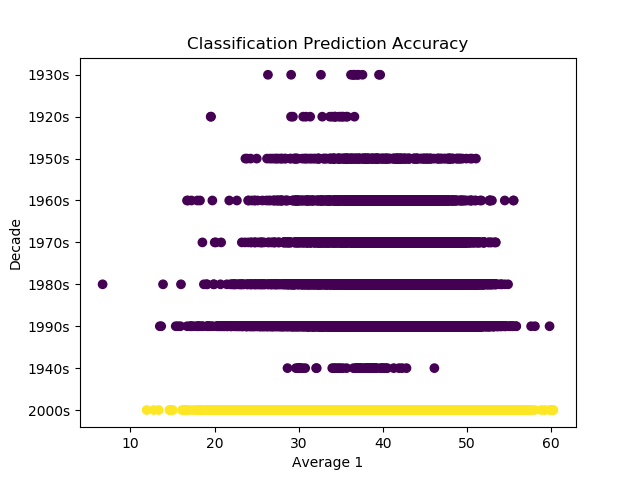

In [24]:
pred_map = np.zeros(len(y_test_decade))

pred_map[mnb_final.predict(X_NBtest_pca)==y_test_decade] = 1
    
fig4 = plt.figure()
ax = fig4.add_subplot(111)
ax.scatter(X_test['avg1'], y_test_decade, c = pred_map)
plt.xlabel("Average 1")
plt.ylabel("Decade")
plt.title("Classification Prediction Accuracy")
plt.show()

<IPython.core.display.Javascript object>


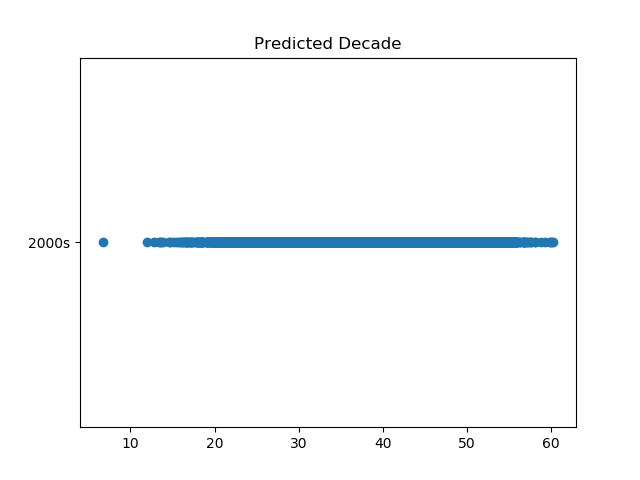

Text(0.5, 1.0, 'Predicted Decade')

In [25]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(X_test['avg1'], mnb_final.predict(X_NBtest_pca))
plt.title("Predicted Decade")

In [27]:
mnb_final2 = nb2.fit(X_NBtrain_pca, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


<IPython.core.display.Javascript object>


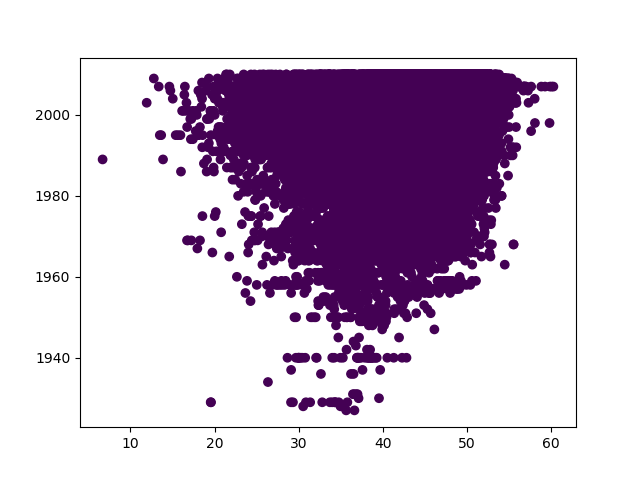

In [28]:
pred_map2 = np.zeros(len(y_test))

pred_map[mnb_final2.predict(X_NBtest_pca)==y_test] = 1

fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(X_test['avg1'], y_test, c = pred_map2)

In [29]:
mnb_final2.score(X_NBtest_pca, y_test)

0.07803602556653108

<IPython.core.display.Javascript object>


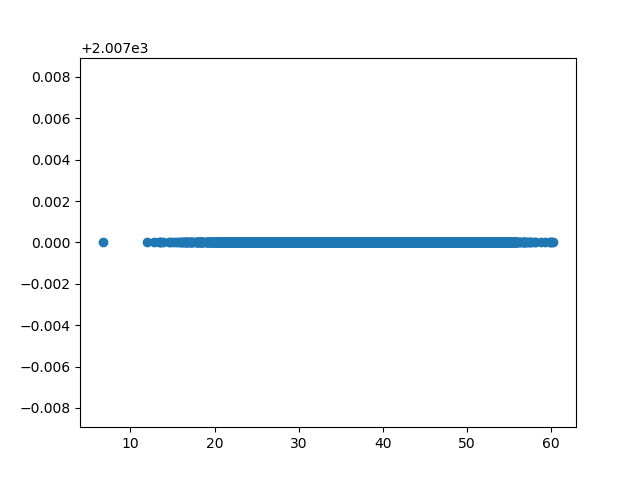

In [30]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.scatter(X_test['avg1'], mnb_final2.predict(X_NBtest_pca))